Implementing K-Means Clustering on Customer Segments

In [2]:
import pandas as pd
file_path = '/content/Mall_Customers.csv'
data = pd.read_csv(file_path)
data.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [3]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
data['cluster'] = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


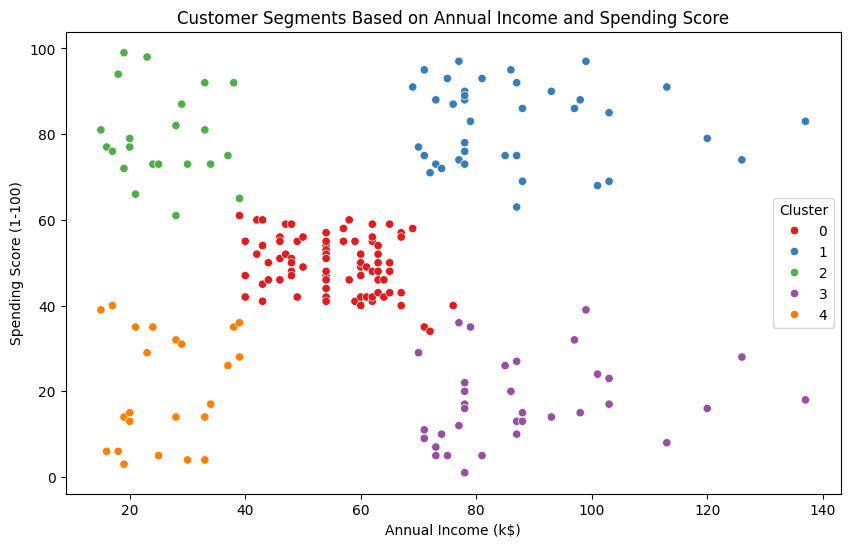

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', palette='Set1', data=data)
plt.title('Customer Segments Based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

Optimal Number of Clusters: Elbow Method and Silhouette Score

In [7]:
from sklearn.metrics import silhouette_score
sse = []
silhouette_scores = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

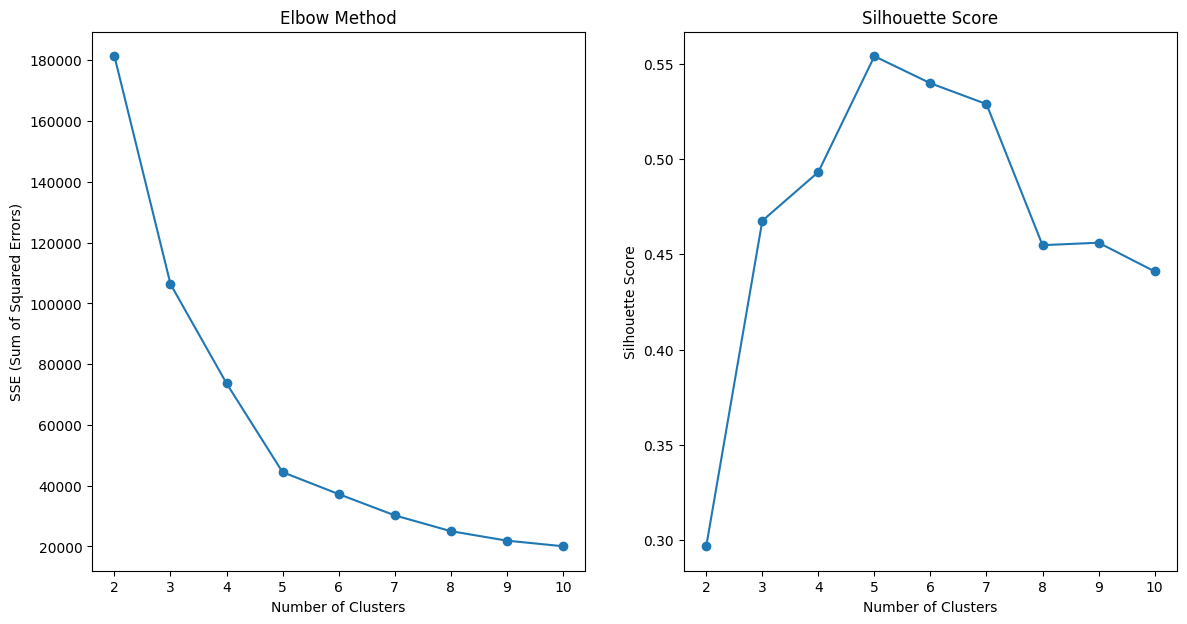

In [10]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

Elbow Method:
The Elbow Method helps to determine the number of clusters by plotting the Sum of Squared Errors (SSE) for each number of clusters. The optimal number of clusters is typically where the SSE starts to decrease at a slower rate, forming an "elbow" shape.
Silhouette Score:
The Silhouette Score measures how similar an object is to its own cluster compared to other clusters. A higher score indicates better-defined clusters. The optimal number of clusters is typically the one with the highest silhouette score.

In [11]:
print("SSE (Sum of Squared Errors):", sse)
print("Silhouette Scores:", silhouette_scores)

SSE (Sum of Squared Errors): [181363.59595959607, 106348.37306211119, 73679.78903948837, 44448.45544793369, 37233.81451071002, 30241.34361793659, 25036.417604033977, 21916.79478984372, 20072.070939404]
Silhouette Scores: [0.2968969162503008, 0.46761358158775435, 0.4931963109249047, 0.553931997444648, 0.53976103063432, 0.5288104473798049, 0.45481197931195283, 0.4561091950997367, 0.4410568674364981]


Cluster Profiling and Insights

In [15]:
kmeans = KMeans(n_clusters=4, random_state=42)
data['cluster'] = kmeans.fit_predict(X)
cluster_centers = kmeans.cluster_centers_
cluster_summary = data.groupby('cluster').mean(numeric_only=True)
print("Cluster Centers:\n", cluster_centers)
print("\nCluster Summary:\n", cluster_summary)

Cluster Centers:
 [[48.26       56.48      ]
 [26.30434783 20.91304348]
 [87.         18.63157895]
 [86.53846154 82.12820513]]

Cluster Summary:
          CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
cluster                                                                   
0             70.97  39.200000           48.260000               56.480000
1             23.00  45.217391           26.304348               20.913043
2            162.00  40.394737           87.000000               18.631579
3            162.00  32.692308           86.538462               82.128205


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


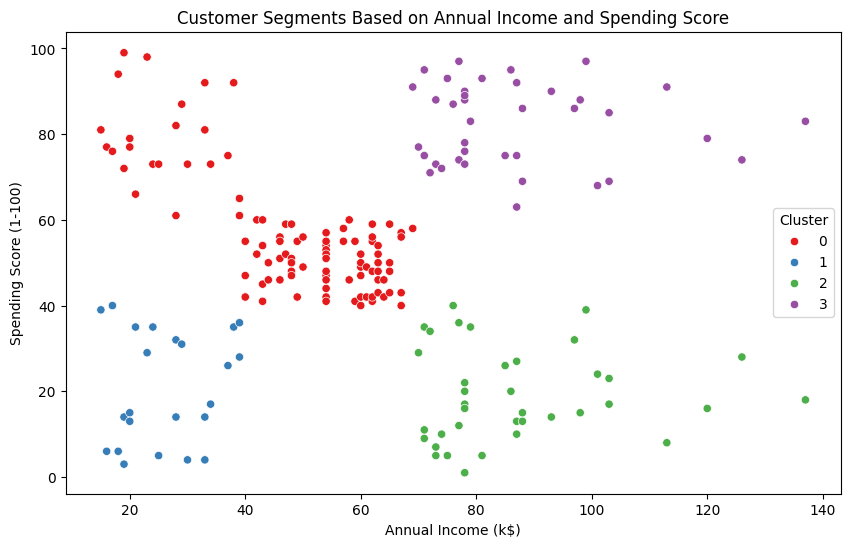

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', palette='Set1', data=data)
plt.title('Customer Segments Based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

Hierarchical Clustering for Customer Segmentation

In [18]:
from sklearn.cluster import AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=4)
data['agg_cluster'] = agg_clustering.fit_predict(X)

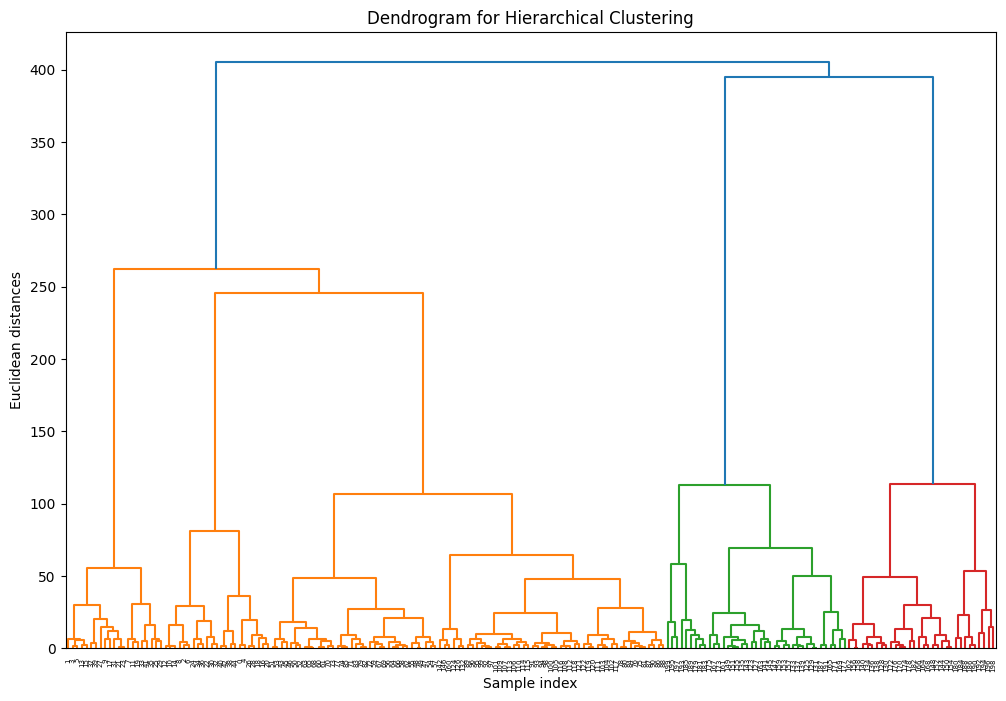

In [20]:
from scipy.cluster.hierarchy import dendrogram
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(12, 8))
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distances')
plt.show()

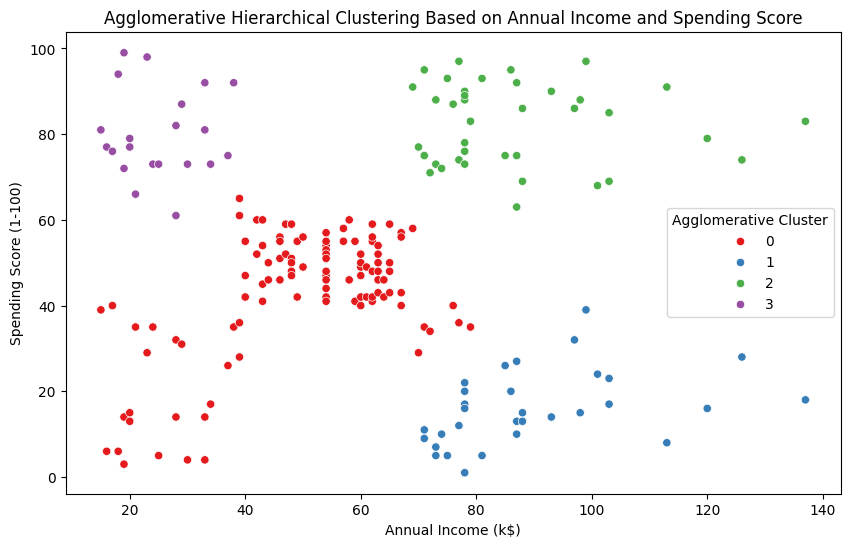

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='agg_cluster', palette='Set1', data=data)
plt.title('Agglomerative Hierarchical Clustering Based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Agglomerative Cluster')
plt.show()

Both clustering methods have their strengths and some weaknesses which can provide valuable insights into customer segments. K-Means is efficient and creates distinct clusters, while hierarchical clustering can capture more complex relationships within the data. Using PCA for dimensionality reduction helps in visualizing these clusters and understanding the differences between the methods.

In [22]:
agg_cluster_summary = data.groupby('agg_cluster').mean(numeric_only=True)
print("\nAgglomerative Cluster Summary:\n", agg_cluster_summary)


Agglomerative Cluster Summary:
              CustomerID        Age  Annual Income (k$)  \
agg_cluster                                              
0             74.074074  43.064815           49.527778   
1            166.250000  41.000000           89.406250   
2            162.000000  32.692308           86.538462   
3             22.000000  25.333333           25.095238   

             Spending Score (1-100)   cluster  
agg_cluster                                    
0                         43.120370  0.324074  
1                         15.593750  2.000000  
2                         82.128205  3.000000  
3                         80.047619  0.000000  


Visualizing Clusters with PCA

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

In [26]:
data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]

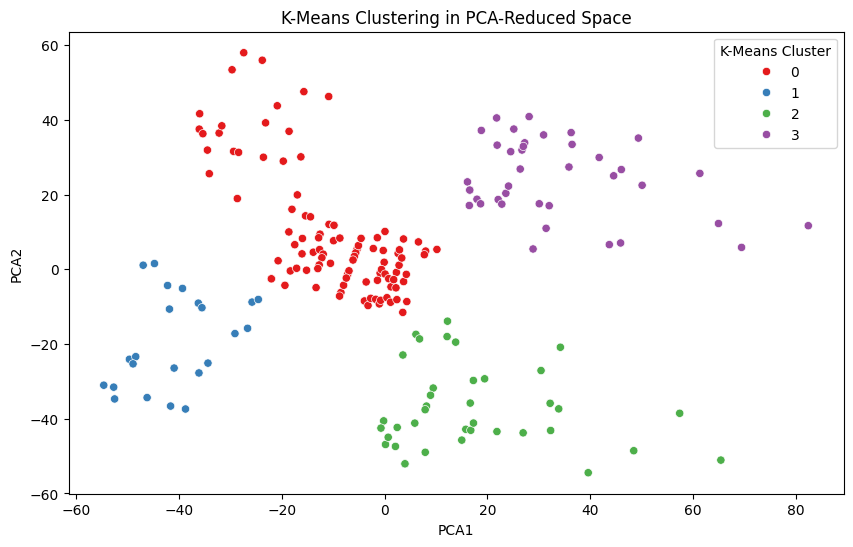

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', palette='Set1', data=data)
plt.title('K-Means Clustering in PCA-Reduced Space')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='K-Means Cluster')
plt.show()

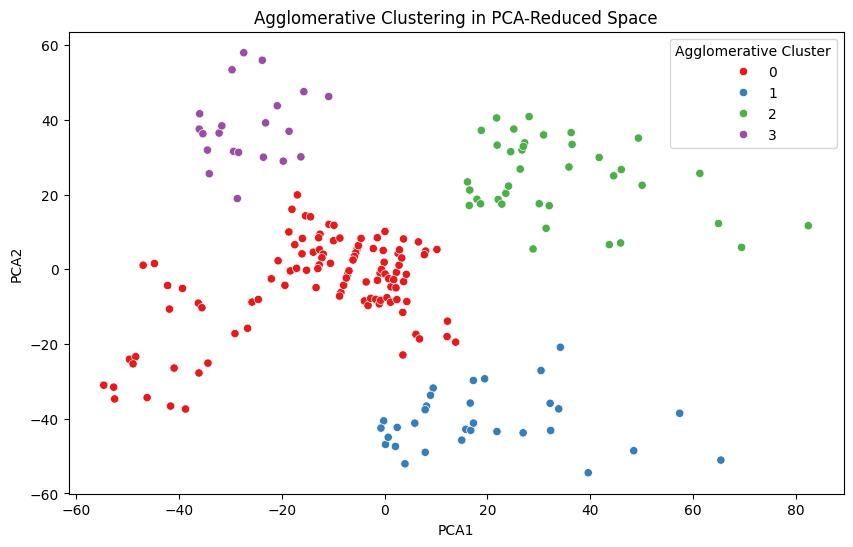

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='agg_cluster', palette='Set1', data=data)
plt.title('Agglomerative Clustering in PCA-Reduced Space')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Agglomerative Cluster')
plt.show()